#XGBoost vs Linear Regression

##Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

## Creating and Preprocessing Data

In [48]:
data = {
    'Size': np.random.randint(1200, 3500, 500),
    'Bedrooms': np.random.randint(2, 6, 500),
    'Bathrooms': np.random.uniform(1, 4, 500),
    'Distance_to_City': np.random.uniform(2, 20, 500),
    'Year_Built': np.random.randint(1970, 2020, 500),
    'Garage_Capacity': np.random.randint(0, 4, 500),
    'Has_Pool': np.random.choice([0, 1], size=500),
    'Neighborhood_Category': np.random.choice(['Urban', 'Suburban', 'Rural'], size=500),
    'Price': np.random.randint(100, 500, 500)
}

df = pd.DataFrame(data)
df = pd.get_dummies(df, columns = ['Neighborhood_Category'])
X = df.drop('Price', axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test

,Size,Bedrooms,Bathrooms,Distance_to_City,Year_Built,Garage_Capacity,Has_Pool,Neighborhood_Category_Rural,Neighborhood_Category_Suburban,Neighborhood_Category_Urban
361,3075,3,3.025776,12.343282,2015,0,1,0,0,1
73,1699,5,1.186602,7.018782,2009,0,0,0,0,1
374,1756,3,2.292811,18.856396,2014,1,0,0,1,0
155,2507,2,1.010337,13.110814,1994,2,0,0,1,0
104,1909,4,3.675502,14.271820,1978,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
347,1566,4,3.953406,8.006050,1981,3,0,0,1,0
86,2780,5,2.808033,10.185042,1976,3,0,1,0,0
75,3190,4,3.026957,8.693780,2018,1,1,0,0,1
438,2860,2,3.852626,3.987242,2012,3,1,1,0,0


##Creating The Model

In [49]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

##Model Evaluation

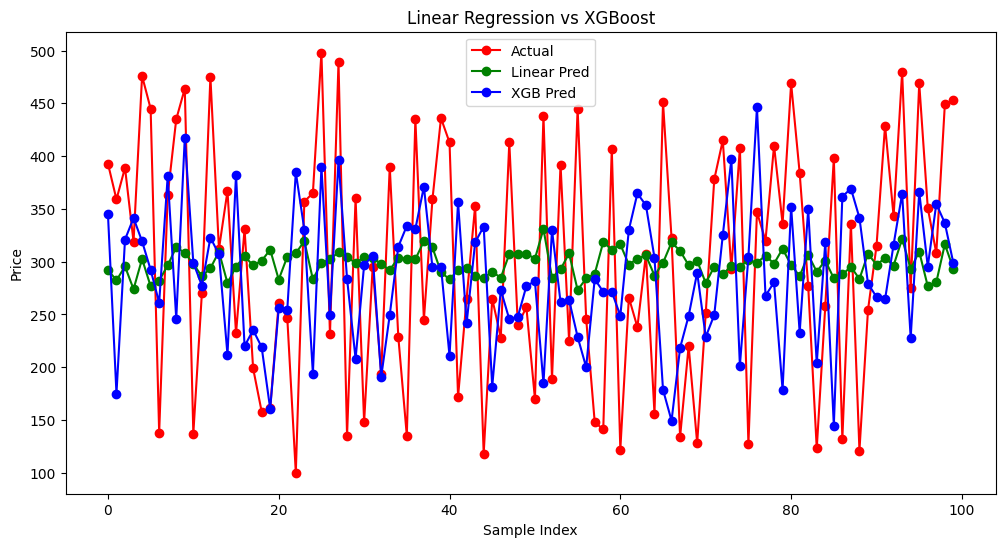

In [51]:
plt.figure(figsize = (12, 6))
plt.plot(y_test.values, c= 'r', label = 'Actual', marker = 'o')
plt.plot(linear_predictions, c = 'g', label = 'Linear Pred', marker = 'o')
plt.plot(xgb_predictions, c = 'b', label = 'XGB Pred', marker = 'o')
plt.title('Linear Regression vs XGBoost')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

#XGBoost vs Logistic Regression(Classification)

##Import Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

## Creating and Preprocessing Data

In [58]:
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 10, n_classes = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [59]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

##Creating The Model

In [62]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

##Model Evaluation

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Print accuracy scores
print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")

Logistic Regression Accuracy: 0.72
XGBoost Accuracy: 0.89


In [64]:
logistic_cm = confusion_matrix(y_test, logistic_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)


<Figure size 1200x600 with 0 Axes>

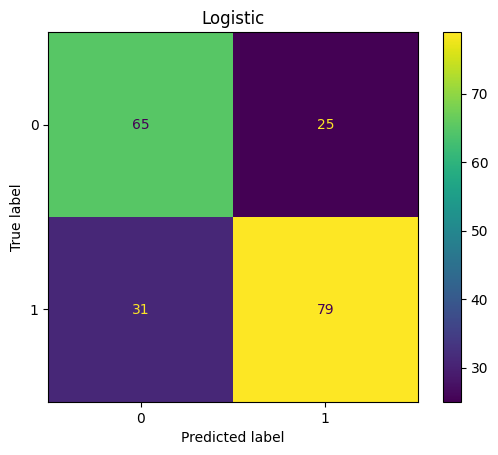

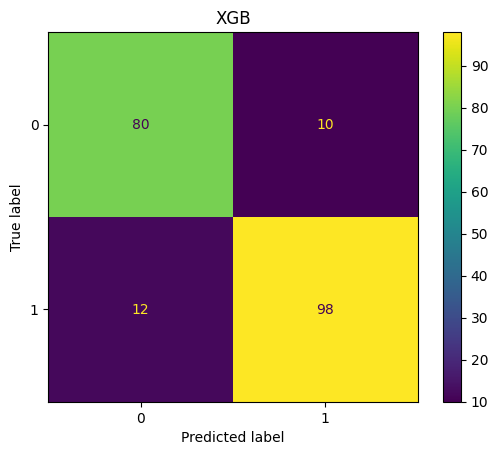

In [66]:
plt.figure(figsize = (12, 6))
disp = ConfusionMatrixDisplay(logistic_cm, display_labels = ['0', '1'])
disp.plot()
plt.title('Logistic')
plt.show()
disp = ConfusionMatrixDisplay(xgb_cm, display_labels = ['0', '1'])
disp.plot()
plt.title('XGB')
plt.show()